In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
# Keras functions
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# Keras dataset
from keras.datasets import mnist

# Keras utils
from keras.utils import np_utils

Using TensorFlow backend.


### 讀mnist

In [3]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

### 看大小

In [4]:
print("訓練數量: %d  ,大小: %d x %d" %x_train0.shape)
print("測試數量: %d  ,大小: %d x %d" %x_test0.shape)


訓練數量: 60000  ,大小: 28 x 28
測試數量: 10000  ,大小: 28 x 28


### 改成一維


In [5]:
x_train = x_train0.reshape(60000, 784)
x_test = x_test0.reshape(10000, 784)

In [6]:
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, add

In [7]:
x_train = x_train-x_train.min()
x_train = x_train/x_train.max()

x_test = x_test-x_test.min()
x_test = x_test/x_test.max()
y_train = np_utils.to_categorical(y_train0, 10)
y_test = np_utils.to_categorical(y_test0, 10)


# model1

In [12]:
f_1 = Dense(300, activation='sigmoid')
f_2 = Dense(300, activation='relu')
f_3 = Dense(200, activation='elu')
f_4 = Dense(150, activation='sigmoid')
f_5 = Dense(200, activation='elu')
f_6 = Dense(150, activation='relu')
f_7 = Dense(10, activation='relu')
x = Input(shape=(784,))

h_1 = f_1(x)
h_2 = f_2(x)
h_3 = f_3(h_1)
h_4 = f_4(h_1)
h_5 = f_5(h_2)
h_6 = f_6(h_2)
h_7 = concatenate([h_3, h_4,h_5,h_6])
y = f_7(h_7)


model1 = Model(x, y)
model1.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 300)          235500      input_2[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 300)          235500      input_2[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 200)          60200       dense_8[0][0]                    
__________________________________________________________________________________________________
dense_11 (

In [13]:
model1.compile(loss='mse', optimizer=SGD(lr=0.03), metrics=['accuracy'])
X = model1.fit(x_train, y_train, batch_size=50, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 5s 91us/step - loss: 0.0603 - acc: 0.5698
Epoch 2/15
60000/60000 [==============================] - 5s 87us/step - loss: 0.0485 - acc: 0.6821
Epoch 3/15
60000/60000 [==============================] - 5s 84us/step - loss: 0.0462 - acc: 0.6984
Epoch 4/15
60000/60000 [==============================] - 5s 85us/step - loss: 0.0448 - acc: 0.7076
Epoch 5/15
60000/60000 [==============================] - 5s 80us/step - loss: 0.0437 - acc: 0.7143
Epoch 6/15
60000/60000 [==============================] - 5s 81us/step - loss: 0.0428 - acc: 0.7204
Epoch 7/15
60000/60000 [==============================] - 5s 84us/step - loss: 0.0421 - acc: 0.7247
Epoch 8/15
60000/60000 [==============================] - 5s 86us/step - loss: 0.0415 - acc: 0.7288
Epoch 9/15
60000/60000 [==============================] - 5s 81us/step - loss: 0.0409 - acc: 0.7323
Epoch 10/15
60000/60000 [==============================] - 5s 83us/step - loss: 0.0404 - acc: 0.7356

# model2

In [14]:
f_1 = Dense(300, activation='elu')
f_2 = Dense(300, activation='relu')
f_3 = Dense(200, activation='elu')
f_4 = Dense(150, activation='elu')
f_5 = Dense(200, activation='elu')
f_6 = Dense(150, activation='relu')
f_7 = Dense(10, activation='relu')
x = Input(shape=(784,))

h_1 = f_1(x)
h_2 = f_2(x)
h_3 = f_3(h_1)
h_4 = f_4(h_1)
h_5 = f_5(h_2)
h_6 = f_6(h_2)
h_7 = concatenate([h_3, h_4,h_5,h_6])
y = f_7(h_7)


model2 = Model(x, y)
model2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 300)          235500      input_3[0][0]                    
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 300)          235500      input_3[0][0]                    
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 200)          60200       dense_15[0][0]                   
__________________________________________________________________________________________________
dense_18 (

In [15]:
model2.compile(loss='mse', optimizer=SGD(lr=0.03), metrics=['accuracy'])
X = model2.fit(x_train, y_train, batch_size=50, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 5s 80us/step - loss: 0.0462 - acc: 0.6775
Epoch 2/15
60000/60000 [==============================] - 5s 81us/step - loss: 0.0288 - acc: 0.8185
Epoch 3/15
60000/60000 [==============================] - 5s 79us/step - loss: 0.0263 - acc: 0.8323
Epoch 4/15
60000/60000 [==============================] - 5s 79us/step - loss: 0.0249 - acc: 0.8398
Epoch 5/15
60000/60000 [==============================] - 5s 83us/step - loss: 0.0238 - acc: 0.8451
Epoch 6/15
60000/60000 [==============================] - 5s 83us/step - loss: 0.0230 - acc: 0.8487
Epoch 7/15
60000/60000 [==============================] - 5s 88us/step - loss: 0.0223 - acc: 0.8523
Epoch 8/15
60000/60000 [==============================] - 5s 85us/step - loss: 0.0217 - acc: 0.8555
Epoch 9/15
60000/60000 [==============================] - 5s 86us/step - loss: 0.0212 - acc: 0.8571
Epoch 10/15
60000/60000 [==============================] - 5s 83us/step - loss: 0.0207 - acc: 0.8597

# model3

In [16]:
f_1 = Dense(300, activation='elu')
f_2 = Dense(300, activation='relu')
f_3 = Dense(200, activation='elu')
f_4 = Dense(150, activation='elu')
f_5 = Dense(200, activation='elu')
f_6 = Dense(150, activation='relu')
f_7 = Dense(10, activation='relu')
x = Input(shape=(784,))

h_1 = f_1(x)
h_2 = f_2(x)
h_3 = f_3(h_1)
h_4 = f_4(h_1)
h_5 = f_5(h_2)
h_6 = f_6(h_2)
h_7 = concatenate([h_3, h_4,h_5,h_6])
y = f_7(h_7)


model3 = Model(x, y)
model3.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 300)          235500      input_4[0][0]                    
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 300)          235500      input_4[0][0]                    
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 200)          60200       dense_22[0][0]                   
__________________________________________________________________________________________________
dense_25 (

In [17]:
model3.compile(loss='mse', optimizer=SGD(lr=0.03), metrics=['accuracy'])
X = model3.fit(x_train, y_train, batch_size=50, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 5s 79us/step - loss: 0.0584 - acc: 0.5779
Epoch 2/15
60000/60000 [==============================] - 5s 78us/step - loss: 0.0479 - acc: 0.6755
Epoch 3/15
60000/60000 [==============================] - 5s 83us/step - loss: 0.0458 - acc: 0.6917
Epoch 4/15
60000/60000 [==============================] - 5s 83us/step - loss: 0.0347 - acc: 0.8157
Epoch 5/15
60000/60000 [==============================] - 5s 82us/step - loss: 0.0270 - acc: 0.8887
Epoch 6/15
60000/60000 [==============================] - 5s 80us/step - loss: 0.0255 - acc: 0.8979
Epoch 7/15
60000/60000 [==============================] - 5s 79us/step - loss: 0.0246 - acc: 0.9026
Epoch 8/15
60000/60000 [==============================] - 5s 79us/step - loss: 0.0238 - acc: 0.9082
Epoch 9/15
60000/60000 [==============================] - 5s 81us/step - loss: 0.0231 - acc: 0.9129
Epoch 10/15
60000/60000 [==============================] - 5s 84us/step - loss: 0.0226 - acc: 0.9164

# model4

In [20]:
f_1 = Dense(300, activation='relu')
f_2 = Dense(300, activation='relu')
f_3 = Dense(200, activation='elu')
f_4 = Dense(150, activation='relu')
f_5 = Dense(200, activation='elu')
f_6 = Dense(150, activation='relu')
f_7 = Dense(10, activation='elu')
x = Input(shape=(784,))

h_1 = f_1(x)
h_2 = f_2(x)
h_3 = f_3(h_1)
h_4 = f_4(h_1)
h_5 = f_5(h_2)
h_6 = f_6(h_2)
h_7 = concatenate([h_3, h_4,h_5,h_6])
y = f_7(h_7)


model4 = Model(x, y)
model4.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_36 (Dense)                (None, 300)          235500      input_6[0][0]                    
__________________________________________________________________________________________________
dense_37 (Dense)                (None, 300)          235500      input_6[0][0]                    
__________________________________________________________________________________________________
dense_38 (Dense)                (None, 200)          60200       dense_36[0][0]                   
__________________________________________________________________________________________________
dense_39 (

In [21]:
model4.compile(loss='mse', optimizer=SGD(lr=0.03), metrics=['accuracy'])
X = model4.fit(x_train, y_train, batch_size=50, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 4s 71us/step - loss: 0.0491 - acc: 0.7979
Epoch 2/15
60000/60000 [==============================] - 4s 71us/step - loss: 0.0323 - acc: 0.8989
Epoch 3/15
60000/60000 [==============================] - 4s 69us/step - loss: 0.0274 - acc: 0.9175
Epoch 4/15
60000/60000 [==============================] - 4s 66us/step - loss: 0.0246 - acc: 0.9272
Epoch 5/15
60000/60000 [==============================] - 4s 68us/step - loss: 0.0227 - acc: 0.9341
Epoch 6/15
60000/60000 [==============================] - 4s 71us/step - loss: 0.0213 - acc: 0.9390
Epoch 7/15
60000/60000 [==============================] - 4s 67us/step - loss: 0.0202 - acc: 0.9428
Epoch 8/15
60000/60000 [==============================] - 4s 67us/step - loss: 0.0194 - acc: 0.9458
Epoch 9/15
60000/60000 [==============================] - 4s 68us/step - loss: 0.0186 - acc: 0.9485
Epoch 10/15
60000/60000 [==============================] - 4s 69us/step - loss: 0.0180 - acc: 0.9506

# model5

In [23]:
f_1 = Dense(300, activation='relu')
f_2 = Dense(300, activation='relu')
f_3 = Dense(200, activation='elu')
f_4 = Dense(150, activation='relu')
f_5 = Dense(200, activation='elu')
f_6 = Dense(150, activation='relu')
f_7 = Dense(10, activation='relu')
x = Input(shape=(784,))

h_1 = f_1(x)
h_2 = f_2(x)
h_3 = f_3(h_1)
h_4 = f_4(h_1)
h_5 = f_5(h_2)
h_6 = f_6(h_2)
h_7 = concatenate([h_3, h_4,h_5,h_6])
y = f_7(h_7)


model5 = Model(x, y)
model5.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_50 (Dense)                (None, 300)          235500      input_8[0][0]                    
__________________________________________________________________________________________________
dense_51 (Dense)                (None, 300)          235500      input_8[0][0]                    
__________________________________________________________________________________________________
dense_52 (Dense)                (None, 200)          60200       dense_50[0][0]                   
__________________________________________________________________________________________________
dense_53 (

In [24]:
model5.compile(loss='mse', optimizer=SGD(lr=0.03), metrics=['accuracy'])
X5 = model5.fit(x_train, y_train, batch_size=50, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 5s 86us/step - loss: 0.0424 - acc: 0.7227
Epoch 2/15
60000/60000 [==============================] - 5s 85us/step - loss: 0.0232 - acc: 0.8909
Epoch 3/15
60000/60000 [==============================] - 5s 83us/step - loss: 0.0191 - acc: 0.9157
Epoch 4/15
60000/60000 [==============================] - 6s 92us/step - loss: 0.0169 - acc: 0.9269
Epoch 5/15
60000/60000 [==============================] - 5s 82us/step - loss: 0.0155 - acc: 0.9342
Epoch 6/15
60000/60000 [==============================] - 5s 82us/step - loss: 0.0144 - acc: 0.9395
Epoch 7/15
60000/60000 [==============================] - 5s 84us/step - loss: 0.0136 - acc: 0.9437
Epoch 8/15
60000/60000 [==============================] - 5s 87us/step - loss: 0.0129 - acc: 0.9476
Epoch 9/15
60000/60000 [==============================] - 5s 84us/step - loss: 0.0123 - acc: 0.9505
Epoch 10/15
60000/60000 [==============================] - 5s 90us/step - loss: 0.0118 - acc: 0.9529

### 可以看出model5略高於model4
#### 繼續將mode5改進
#### model6 跟 model5只差batch size變小
# 
# 
# 
# model6

In [31]:
f_1 = Dense(300, activation='relu')
f_2 = Dense(300, activation='relu')
f_3 = Dense(200, activation='elu')
f_4 = Dense(150, activation='relu')
f_5 = Dense(200, activation='elu')
f_6 = Dense(150, activation='relu')
f_7 = Dense(10, activation='relu')
x = Input(shape=(784,))

h_1 = f_1(x)
h_2 = f_2(x)
h_3 = f_3(h_1)
h_4 = f_4(h_1)
h_5 = f_5(h_2)
h_6 = f_6(h_2)
h_7 = concatenate([h_3, h_4,h_5,h_6])
y = f_7(h_7)


model6 = Model(x, y)
model6.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 784)          0                                            
__________________________________________________________________________________________________
dense_78 (Dense)                (None, 300)          235500      input_12[0][0]                   
__________________________________________________________________________________________________
dense_79 (Dense)                (None, 300)          235500      input_12[0][0]                   
__________________________________________________________________________________________________
dense_80 (Dense)                (None, 200)          60200       dense_78[0][0]                   
__________________________________________________________________________________________________
dense_81 (

In [32]:
model6.compile(loss='mse', optimizer=SGD(lr=0.03), metrics=['accuracy'])
X6 = model6.fit(x_train, y_train, batch_size=25, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 9s 148us/step - loss: 0.0457 - acc: 0.7083
Epoch 2/15
60000/60000 [==============================] - 9s 143us/step - loss: 0.0352 - acc: 0.7976
Epoch 3/15
60000/60000 [==============================] - 9s 142us/step - loss: 0.0329 - acc: 0.8122
Epoch 4/15
60000/60000 [==============================] - 9s 145us/step - loss: 0.0315 - acc: 0.8218
Epoch 5/15
60000/60000 [==============================] - 9s 143us/step - loss: 0.0305 - acc: 0.8284
Epoch 6/15
60000/60000 [==============================] - 9s 145us/step - loss: 0.0297 - acc: 0.8342
Epoch 7/15
60000/60000 [==============================] - 9s 144us/step - loss: 0.0291 - acc: 0.8379
Epoch 8/15
60000/60000 [==============================] - 9s 145us/step - loss: 0.0286 - acc: 0.8407
Epoch 9/15
60000/60000 [==============================] - 9s 147us/step - loss: 0.0281 - acc: 0.8440
Epoch 10/15
60000/60000 [==============================] - 9s 149us/step - loss: 0.0277 - a

### 可以看出model5略高於model6
### 繼續將mode5改進
### model7 跟 model5只差batch size變大
# 
# 
# 
# model7


In [34]:
f_1 = Dense(300, activation='relu')
f_2 = Dense(300, activation='relu')
f_3 = Dense(200, activation='elu')
f_4 = Dense(150, activation='relu')
f_5 = Dense(200, activation='elu')
f_6 = Dense(150, activation='relu')
f_7 = Dense(10, activation='relu')
x = Input(shape=(784,))

h_1 = f_1(x)
h_2 = f_2(x)
h_3 = f_3(h_1)
h_4 = f_4(h_1)
h_5 = f_5(h_2)
h_6 = f_6(h_2)
h_7 = concatenate([h_3, h_4,h_5,h_6])
y = f_7(h_7)


model7 = Model(x, y)
model7.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 784)          0                                            
__________________________________________________________________________________________________
dense_85 (Dense)                (None, 300)          235500      input_13[0][0]                   
__________________________________________________________________________________________________
dense_86 (Dense)                (None, 300)          235500      input_13[0][0]                   
__________________________________________________________________________________________________
dense_87 (Dense)                (None, 200)          60200       dense_85[0][0]                   
__________________________________________________________________________________________________
dense_88 (

In [35]:
model7.compile(loss='mse', optimizer=SGD(lr=0.03), metrics=['accuracy'])
X7 = model7.fit(x_train, y_train, batch_size=100, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 4s 60us/step - loss: 0.0603 - acc: 0.5694
Epoch 2/15
60000/60000 [==============================] - 3s 54us/step - loss: 0.0427 - acc: 0.7174
Epoch 3/15
60000/60000 [==============================] - 3s 55us/step - loss: 0.0356 - acc: 0.8005
Epoch 4/15
60000/60000 [==============================] - 4s 59us/step - loss: 0.0309 - acc: 0.8503
Epoch 5/15
60000/60000 [==============================] - 3s 58us/step - loss: 0.0288 - acc: 0.8663
Epoch 6/15
60000/60000 [==============================] - 3s 57us/step - loss: 0.0275 - acc: 0.8769
Epoch 7/15
60000/60000 [==============================] - 4s 62us/step - loss: 0.0265 - acc: 0.8848
Epoch 8/15
60000/60000 [==============================] - 4s 58us/step - loss: 0.0256 - acc: 0.8912
Epoch 9/15
60000/60000 [==============================] - 3s 58us/step - loss: 0.0250 - acc: 0.8960
Epoch 10/15
60000/60000 [==============================] - 4s 62us/step - loss: 0.0244 - acc: 0.9000

### 看來改 batchsize沒啥用
### 繼續將mode5改進
### model8 跟 model5只差lr
# 
# 
# 
# model8

In [40]:
f_1 = Dense(300, activation='relu')
f_2 = Dense(300, activation='relu')
f_3 = Dense(200, activation='elu')
f_4 = Dense(150, activation='relu')
f_5 = Dense(200, activation='elu')
f_6 = Dense(150, activation='relu')
f_7 = Dense(10, activation='relu')
x = Input(shape=(784,))

h_1 = f_1(x)
h_2 = f_2(x)
h_3 = f_3(h_1)
h_4 = f_4(h_1)
h_5 = f_5(h_2)
h_6 = f_6(h_2)
h_7 = concatenate([h_3, h_4,h_5,h_6])
y = f_7(h_7)


model8 = Model(x, y)
model8.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 784)          0                                            
__________________________________________________________________________________________________
dense_99 (Dense)                (None, 300)          235500      input_15[0][0]                   
__________________________________________________________________________________________________
dense_100 (Dense)               (None, 300)          235500      input_15[0][0]                   
__________________________________________________________________________________________________
dense_101 (Dense)               (None, 200)          60200       dense_99[0][0]                   
__________________________________________________________________________________________________
dense_102 

In [41]:
model8.compile(loss='mse', optimizer=SGD(lr=0.01), metrics=['accuracy'])
X8 = model8.fit(x_train, y_train, batch_size=50, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 5s 90us/step - loss: 0.0767 - acc: 0.3921
Epoch 2/15
60000/60000 [==============================] - 5s 85us/step - loss: 0.0487 - acc: 0.6726
Epoch 3/15
60000/60000 [==============================] - 5s 90us/step - loss: 0.0341 - acc: 0.7899
Epoch 4/15
60000/60000 [==============================] - 5s 91us/step - loss: 0.0309 - acc: 0.8088
Epoch 5/15
60000/60000 [==============================] - 5s 85us/step - loss: 0.0292 - acc: 0.8187
Epoch 6/15
60000/60000 [==============================] - 5s 90us/step - loss: 0.0280 - acc: 0.8250
Epoch 7/15
60000/60000 [==============================] - 6s 95us/step - loss: 0.0271 - acc: 0.8299
Epoch 8/15
60000/60000 [==============================] - 5s 89us/step - loss: 0.0264 - acc: 0.8340
Epoch 9/15
60000/60000 [==============================] - 5s 88us/step - loss: 0.0258 - acc: 0.8372
Epoch 10/15
60000/60000 [==============================] - 6s 92us/step - loss: 0.0252 - acc: 0.8403

### 看來改 lr沒啥用
### 繼續將mode5改進
### model9 : 將model5改Adam
#

#

#
# model9

In [42]:
f_1 = Dense(300, activation='relu')
f_2 = Dense(300, activation='relu')
f_3 = Dense(200, activation='elu')
f_4 = Dense(150, activation='relu')
f_5 = Dense(200, activation='elu')
f_6 = Dense(150, activation='relu')
f_7 = Dense(10, activation='relu')
x = Input(shape=(784,))

h_1 = f_1(x)
h_2 = f_2(x)
h_3 = f_3(h_1)
h_4 = f_4(h_1)
h_5 = f_5(h_2)
h_6 = f_6(h_2)
h_7 = concatenate([h_3, h_4,h_5,h_6])
y = f_7(h_7)


model9 = Model(x, y)
model9.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, 784)          0                                            
__________________________________________________________________________________________________
dense_106 (Dense)               (None, 300)          235500      input_16[0][0]                   
__________________________________________________________________________________________________
dense_107 (Dense)               (None, 300)          235500      input_16[0][0]                   
__________________________________________________________________________________________________
dense_108 (Dense)               (None, 200)          60200       dense_106[0][0]                  
__________________________________________________________________________________________________
dense_109 

In [56]:
from keras import optimizers
from keras.optimizers import Adam
model9.compile(loss='mse', optimizer=Adam(lr=0.03), metrics=['accuracy'])
X9 = model9.fit(x_train, y_train, batch_size=50, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 8s 137us/step - loss: 0.1193 - acc: 0.0987
Epoch 2/15
60000/60000 [==============================] - 8s 135us/step - loss: 0.1000 - acc: 0.0987
Epoch 3/15
60000/60000 [==============================] - 8s 126us/step - loss: 0.1000 - acc: 0.0987
Epoch 4/15
60000/60000 [==============================] - 7s 121us/step - loss: 0.1000 - acc: 0.0987
Epoch 5/15
60000/60000 [==============================] - 7s 117us/step - loss: 0.1000 - acc: 0.0987
Epoch 6/15
60000/60000 [==============================] - 7s 113us/step - loss: 0.1000 - acc: 0.0987
Epoch 7/15
60000/60000 [==============================] - 7s 111us/step - loss: 0.1000 - acc: 0.0987
Epoch 8/15
60000/60000 [==============================] - 7s 115us/step - loss: 0.1000 - acc: 0.0987
Epoch 9/15
60000/60000 [==============================] - 7s 118us/step - loss: 0.1000 - acc: 0.0987
Epoch 10/15
60000/60000 [==============================] - 7s 121us/step - loss: 0.1000 - a

### 看來改 Adam沒啥用 還誇張爛
### 繼續將mode5改進
### model10 : 將model5改RMSprop
#

#

#
# model10

In [58]:
f_1 = Dense(300, activation='relu')
f_2 = Dense(300, activation='relu')
f_3 = Dense(200, activation='elu')
f_4 = Dense(150, activation='relu')
f_5 = Dense(200, activation='elu')
f_6 = Dense(150, activation='relu')
f_7 = Dense(10, activation='relu')
x = Input(shape=(784,))

h_1 = f_1(x)
h_2 = f_2(x)
h_3 = f_3(h_1)
h_4 = f_4(h_1)
h_5 = f_5(h_2)
h_6 = f_6(h_2)
h_7 = concatenate([h_3, h_4,h_5,h_6])
y = f_7(h_7)


model10 = Model(x, y)
model10.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 784)          0                                            
__________________________________________________________________________________________________
dense_113 (Dense)               (None, 300)          235500      input_17[0][0]                   
__________________________________________________________________________________________________
dense_114 (Dense)               (None, 300)          235500      input_17[0][0]                   
__________________________________________________________________________________________________
dense_115 (Dense)               (None, 200)          60200       dense_113[0][0]                  
__________________________________________________________________________________________________
dense_116 

In [60]:
from keras import optimizers
from keras.optimizers import RMSprop
model10.compile(loss='mse', optimizer=RMSprop(lr=0.03), metrics=['accuracy'])
X10 = model10.fit(x_train, y_train, batch_size=50, epochs=3)


Epoch 1/3
60000/60000 [==============================] - 7s 120us/step - loss: 0.1000 - acc: 0.0987
Epoch 2/3
60000/60000 [==============================] - 6s 105us/step - loss: 0.1000 - acc: 0.0987
Epoch 3/3
60000/60000 [==============================] - 6s 101us/step - loss: 0.1000 - acc: 0.0987


### 看來改 RMSprop沒啥用 還誇張爛
### 繼續將mode5改進
### model11 : 將model5改epochs=80
#

#

#
# model11

In [61]:
f_1 = Dense(300, activation='relu')
f_2 = Dense(300, activation='relu')
f_3 = Dense(200, activation='elu')
f_4 = Dense(150, activation='relu')
f_5 = Dense(200, activation='elu')
f_6 = Dense(150, activation='relu')
f_7 = Dense(10, activation='relu')
x = Input(shape=(784,))

h_1 = f_1(x)
h_2 = f_2(x)
h_3 = f_3(h_1)
h_4 = f_4(h_1)
h_5 = f_5(h_2)
h_6 = f_6(h_2)
h_7 = concatenate([h_3, h_4,h_5,h_6])
y = f_7(h_7)


model11 = Model(x, y)
model11.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           (None, 784)          0                                            
__________________________________________________________________________________________________
dense_120 (Dense)               (None, 300)          235500      input_18[0][0]                   
__________________________________________________________________________________________________
dense_121 (Dense)               (None, 300)          235500      input_18[0][0]                   
__________________________________________________________________________________________________
dense_122 (Dense)               (None, 200)          60200       dense_120[0][0]                  
__________________________________________________________________________________________________
dense_123 

In [62]:
model11.compile(loss='mse', optimizer=SGD(lr=0.03), metrics=['accuracy'])
X11 = model11.fit(x_train, y_train, batch_size=50, epochs=80)


Epoch 1/80
60000/60000 [==============================] - 6s 98us/step - loss: 0.0520 - acc: 0.6193
Epoch 2/80
60000/60000 [==============================] - 5s 90us/step - loss: 0.0316 - acc: 0.8008
Epoch 3/80
60000/60000 [==============================] - 5s 92us/step - loss: 0.0236 - acc: 0.8748
Epoch 4/80
60000/60000 [==============================] - 6s 92us/step - loss: 0.0176 - acc: 0.9244
Epoch 5/80
60000/60000 [==============================] - 6s 92us/step - loss: 0.0160 - acc: 0.9320
Epoch 6/80
60000/60000 [==============================] - 6s 93us/step - loss: 0.0149 - acc: 0.9373
Epoch 7/80
60000/60000 [==============================] - 6s 93us/step - loss: 0.0140 - acc: 0.9422
Epoch 8/80
60000/60000 [==============================] - 6s 94us/step - loss: 0.0132 - acc: 0.9462
Epoch 9/80
60000/60000 [==============================] - 6s 95us/step - loss: 0.0126 - acc: 0.9496
Epoch 10/80
60000/60000 [==============================] - 6s 94us/step - loss: 0.0121 - acc: 0.9520

### 印出圖

Text(0.5,1,'model accuracy')

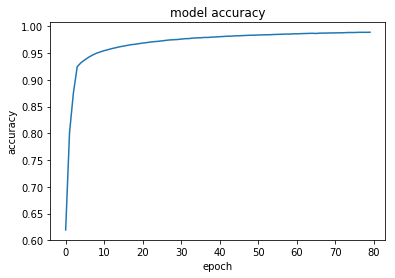

In [64]:
import matplotlib.pyplot as plt

plt.plot(X11.history['acc'])

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model accuracy')



### 結果

In [65]:
print("最後 Loss: ",X11.history['loss'][-1])
print("最後 accuracy: ",X11.history['acc'][-1])

最後 Loss:  0.004160275901764787
最後 accuracy:  0.9888000041246414
